# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import pandas as pd

if '../../../notebooks/' not in sys.path:
    sys.path.append('../../../notebooks/')

import utils.constants as cts

from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from net_trainer import NetworkTrainer
from model_trainer import BaseModel, Optimizer

# Start Network Trainer

In [3]:
req = cts.ICAO_REQ.HAT

kwargs = { 
    'use_neptune': False,
    'exp_params' : {
        'name': 'train_vgg16',
        'description': f'Training network for ALL requisites',
        'tags': ['vgg16', 'ground truths', 'adamax', 'fvc', 'binary_output', 'mtl'],
        'src_files': ['net_trainer.py']
    },
    'properties': {
#         'tagger_model': OpenfaceMouth(),
#         'dl_names': {'train_validation':
#                            [DLName.VGGFACE2, DLName.CALTECH, DLName.FVC_PYBOSSA, 
#                             DLName.CVL, DLName.FEI_DB, DLName.GEORGIA_TECH, DLName.COLOR_FERET,
#                             DLName.ICPR04, DLName.IMFDB, DLName.IJBC, DLName.LFW, DLName.CASIA_WF,
#                             DLName.GENKI4K_DB],
#                       'test': [],
        #'reqs': list(cts.ICAO_REQ),
        'reqs': [req],
        'aligned': True,
        'use_gt_data': True,
        'gt_names': {
            'train_validation': [],
            'test': [],
            'train_validation_test': [GTName.FVC]
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': False,
        'sample_training_data': False,
        'sample_prop': .9,
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 64,
        'n_epochs': 10,
        'early_stopping': 10,
        'shuffle': True,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'train_prop': 0.9,
        'validation_prop': 0.05,
        'test_prop': 0.05,
        'seed': 42,
        'validation_split': 0.1,
        'dropout': 0.3
    }
}

trainer = NetworkTrainer(**kwargs)

-----
Use Neptune:  False
-----
Args: 
{'exp_params': {'description': 'Training network for ALL requisites',
                'name': 'train_vgg16',
                'src_files': ['net_trainer.py'],
                'tags': ['vgg16',
                         'ground truths',
                         'adamax',
                         'fvc',
                         'binary_output',
                         'mtl']},
 'net_train_params': {'base_model': <BaseModel.VGG16: {'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7f50861de040>}>,
                      'batch_size': 64,
                      'dropout': 0.3,
                      'early_stopping': 10,
                      'learning_rate': 0.001,
                      'n_epochs': 10,
                      'optimizer': <Optimizer.ADAMAX: 'Adamax'>,
                      'seed': 42,
                      'shuffle': True,
                      'test_prop': 0.05,
                      'train_prop': 0.9,
          

# Load Data

In [4]:
trainer.load_training_data()

Loading data
Loading GT FVC...
..Ignoring 19 empty label values
Input data.shape: (5761, 4)
Data loaded


# Sampling Training Data

In [5]:
trainer.sample_training_data()

Not applying subsampling in training data!


# Data Balancing

In [6]:
trainer.balance_input_data()

Not balancing input_data


# Data Generators

In [7]:
trainer.setup_data_generators()

Starting data generators
Found 4926 validated image filenames belonging to 2 classes.
Found 547 validated image filenames belonging to 2 classes.
Found 288 validated image filenames belonging to 2 classes.
TOTAL: 5761


# Labels Distribution

In [8]:
trainer.summary_labels_dist()

Requisite: HAT
N_TRAIN_VALID_COMP: 4681 (85.53%)
N_TRAIN_VALID_NOT_COMP: 792 (14.47%)
N_TRAIN_VALID_DUMMY: 0 (0.0%)
N_TEST_COMP: 238 (82.64%)
N_TEST_NOT_COMP: 50 (17.36%)
N_TEST_DUMMY: 0 (0.0%)
----


In [9]:
trainer.summary_gen_labels_dist()

N_TRAIN_COMP: 720 (14.62%)
N_TRAIN_NON_COMP: 720 (85.38%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALID_COMP: 72 (13.16%)
N_VALID_NON_COMP: 475 (86.84%)
N_VALID_DUMMY: 0 (0.0%)
N_TEST_COMP: 50 (17.36%)
N_TEST_NON_COMP: 238 (82.64%)
N_TEST_DUMMY: 0 (0.0%)


# Use Neptune

In [10]:
trainer.start_neptune()
trainer.create_experiment()

Not using Neptune
Not using Neptune


# Create Model

In [11]:
trainer.create_model()

Creating model...
Model created


# Vizualize Model

# Training Model

In [12]:
trainer.train_model()

Training VGG16 network
Epoch 1/10
76/76 [==============================] - 79s 1s/step - loss: 0.2539 - accuracy: 0.9111 - val_loss: 0.1382 - val_accuracy: 0.9590
Epoch 2/10
76/76 [==============================] - 41s 534ms/step - loss: 0.1629 - accuracy: 0.9519 - val_loss: 0.1068 - val_accuracy: 0.9609
Epoch 3/10
76/76 [==============================] - 41s 533ms/step - loss: 0.1351 - accuracy: 0.9611 - val_loss: 0.0969 - val_accuracy: 0.9668
Epoch 4/10
76/76 [==============================] - 41s 534ms/step - loss: 0.1298 - accuracy: 0.9611 - val_loss: 0.0908 - val_accuracy: 0.9688
Epoch 5/10
76/76 [==============================] - 40s 530ms/step - loss: 0.1190 - accuracy: 0.9634 - val_loss: 0.0923 - val_accuracy: 0.9629
Epoch 6/10
76/76 [==============================] - 41s 533ms/step - loss: 0.1059 - accuracy: 0.9628 - val_loss: 0.0752 - val_accuracy: 0.9805
Epoch 7/10
76/76 [==============================] - 40s 529ms/step - loss: 0.1115 - accuracy: 0.9642 - val_loss: 0.0886 - 

# Plots

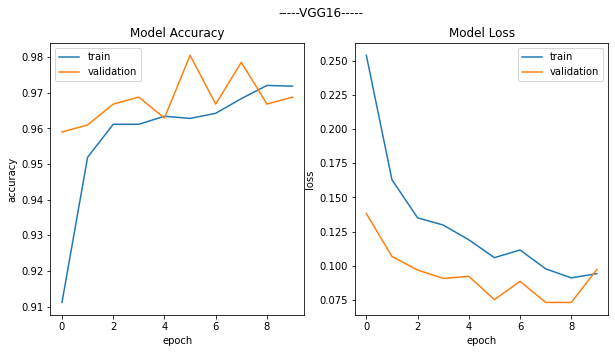

In [13]:
trainer.draw_training_history()

# Load Best Model

In [14]:
trainer.load_best_model()

..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [15]:
trainer.save_model()

Not saving model!


# Test Trained Model

Testing Trained Model
Predicting labels....
Prediction finished!
Requisite: HAT
Classification report -----------------------------------
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        50
           1       0.97      0.98      0.98       238

    accuracy                           0.97       288
   macro avg       0.95      0.93      0.94       288
weighted avg       0.96      0.97      0.96       288

Accuracy ------------------------------------------------
Model Accuracy: 96.53%
---------------------------------------------------------


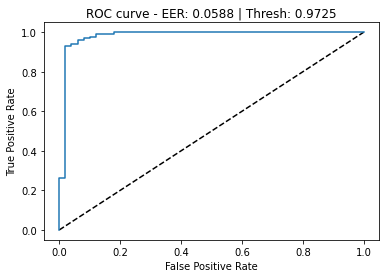

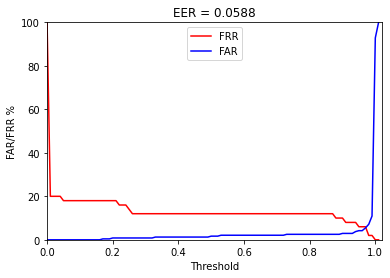

Requisite: ICAO_REQ.HAT - EER: 5.8824% - Best Threshold: 0.9724979856434991
Confusion matrix ----------------------------------------
TP: 234 | TN: 44 | FP: 6 | FN: 4


In [18]:
trainer.test_model()

# Evaluate Model

In [19]:
trainer.evaluate_model()

Evaluating model
Loss:  0.1171
Accuracy:  0.9653


# Vizualize Model Classification

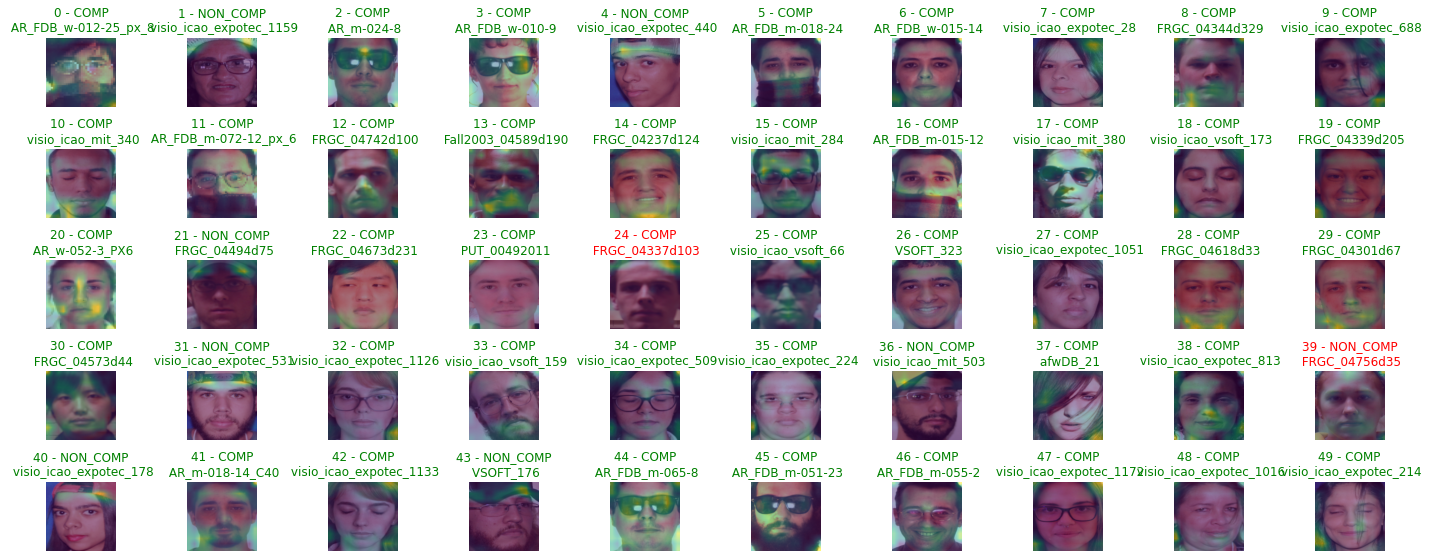

In [22]:
trainer.vizualize_predictions()

# Finishing Experiment Manager

In [23]:
trainer.finish_experiment()

Not using Neptune
